In [23]:
# Add the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Files to load
data_to_load = os.path.join("Resources","train_test.csv")

In [5]:
# Read the school data file and store it in a Pandas DataFrame.
data_df = pd.read_csv(data_to_load)
data_df

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,2,MORNING,1,109,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
1,1,7,0,7,MORNING,1,109,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
2,1,7,0,7,MORNING,1,109,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
3,1,7,0,9,MORNING,1,109,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
4,1,7,0,7,EARLY_MORNING,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6538716,12,7,0,1,LATE_NIGHT,11,6,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6538717,12,7,0,1,EVENING,11,8,123,Hawaiian Airlines Inc.,1318,...,16,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6538718,12,7,0,1,EVENING,11,8,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21
6538719,12,7,0,1,LATE_NIGHT,12,6,123,Hawaiian Airlines Inc.,1318,...,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21


In [6]:
# Determine if there are any missing values in the flight data.
data_df.count()

MONTH                            6538721
DAY_OF_WEEK                      6538721
DEP_DEL15                        6538721
DISTANCE_GROUP                   6538721
DEP_BLOCK                        6538721
SEGMENT_NUMBER                   6538721
CONCURRENT_FLIGHTS               6538721
NUMBER_OF_SEATS                  6538721
CARRIER_NAME                     6538721
AIRPORT_FLIGHTS_MONTH            6538721
AIRLINE_FLIGHTS_MONTH            6538721
AIRLINE_AIRPORT_FLIGHTS_MONTH    6538721
AVG_MONTHLY_PASS_AIRPORT         6538721
AVG_MONTHLY_PASS_AIRLINE         6538721
FLT_ATTENDANTS_PER_PASS          6538721
GROUND_SERV_PER_PASS             6538721
PLANE_AGE                        6538721
DEPARTING_AIRPORT                6538721
LATITUDE                         6538721
LONGITUDE                        6538721
PREVIOUS_AIRPORT                 6538721
PRCP                             6538721
SNOW                             6538721
SNWD                             6538721
TMAX            

In [7]:
# count duplicates
data_df.duplicated().sum()

666638

In [8]:
# count unique records
(~data_df.duplicated()).sum()

5872083

In [9]:
# create dataframe with only duplicates (arugment 'keep=False' returns both parts of the duplication)
dup_data_df = data_df.loc[data_df.duplicated(keep=False), :]


In [10]:
# display dups
dup_data_df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
43,1,7,0,5,MORNING,1,109,129,Allegiant Air,13056,...,11,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
44,1,7,0,5,MORNING,1,109,129,Allegiant Air,13056,...,11,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
45,1,7,0,6,MORNING,1,109,129,Allegiant Air,13056,...,11,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
46,1,7,0,5,MORNING,1,109,129,Allegiant Air,13056,...,11,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
50,1,7,0,1,MORNING,1,109,143,Southwest Airlines Co.,13056,...,16,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [11]:
# drop dups
clean_data_df = data_df.drop_duplicates()

In [14]:
# get counts by month
clean_data_df.groupby('MONTH')['MONTH'].count()

MONTH
1     494167
2     444693
3     545943
4     525703
5     549978
6     549295
7     569955
8     571197
10    553309
11    524094
12    543749
Name: MONTH, dtype: int64

In [16]:
# create a sample size = 600,000
clean_sample = clean_data_df.sample(600000)

In [80]:
clean_sample.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,DEP_BLOCK,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
5808420,11,1,0,4,AFTERNOON,3,18,70,SkyWest Airlines Inc.,2176,...,1,Charleston International,32.899,-80.039,Logan International,0.00,0.0,0.0,71.0,3.36
154113,1,4,0,5,EVENING,4,24,230,Frontier Airlines Inc.,2327,...,2,General Mitchell Field,42.950,-87.897,San Diego International Lindbergh Fl,0.00,0.0,0.0,27.0,6.04
2849262,6,6,0,4,MORNING,2,50,50,American Eagle Airlines Inc.,7008,...,15,Miami International,25.792,-80.286,Greenville-Spartanburg,0.78,0.0,0.0,85.0,7.61
738310,2,5,1,3,LATE_NIGHT,8,153,158,Delta Air Lines Inc.,28011,...,21,Atlanta Municipal,33.641,-84.427,Friendship International,0.00,0.0,0.0,62.0,2.91
1948842,4,7,0,3,MIDDAY,3,31,199,Delta Air Lines Inc.,3690,...,21,Southwest Florida International,26.536,-81.755,Atlanta Municipal,0.00,0.0,0.0,90.0,7.38


In [55]:
# calc distribution of 'on-time' vs 'delay'
delay = clean_sample[["MONTH","DEP_DEL15"]].loc[clean_sample["DEP_DEL15"] == 1]
delay.head()

,MONTH,DEP_DEL15
738310,2,1
1810840,4,1
5448927,10,1
5821295,11,1
3088566,6,1


In [68]:
delay_df = delay[["MONTH","DEP_DEL15"]].groupby('MONTH').count()
delay_df 

,DEP_DEL15
MONTH,
1,9030
2,9937
3,9757
4,9890
5,11551
6,13846
7,12402
8,12422
10,9134


In [77]:
y_axis = delay_df["DEP_DEL15"]
#x_axis = delay.MONTH.unique()
x_axis = ["Jan", "Feb", "Mar", "April", "May", "June", "July", "Aug", "Oct", "Nov", "Dec"]

Text(0.5, 1.0, 'Delays by Month')

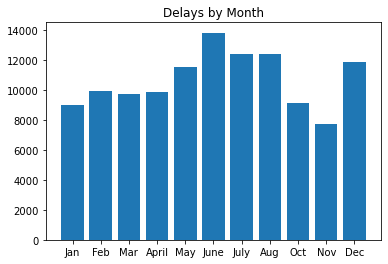

In [79]:
plt.bar(x_axis, y_axis)

plt.title("Delays by Month")


In [20]:
# output to csv

clean_sample.to_csv('sample_train_test_unique.csv', index=False)